<a href="https://colab.research.google.com/github/MuindeEsther/BootcampProjects/blob/main/Customer_churn_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## **Project Option 2**

  Imagine you're working with Sprint, one of the biggest telecom companies in the USA. They're really keen on figuring out how many customers might decide to leave them in the coming months. Luckily, they've got a bunch of past data about when customers have left before, as well as info about who these customers are, what they've bought, and other things like that. So, if you were in charge of predicting customer churn, how would you go about using machine learning to make a good guess about which customers might leave? What steps would you take to create a machine learning model that can predict if someone's going to leave or not?

  I found this dataset on kaggle and it contains information about Telco customers.We will first look at the data, perform Exploratory Data Analysis and perform a prediction model

In [ ]:
import numpy as np
from IPython.display import Image
import branca.colormap as cm
import pandas as pd
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import seaborn as sns
import matplotlib.pyplot as pl
from sklearn.preprocessing import LabelEncoder
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score,recall_score, precision_score
from sklearn.metrics import average_precision_score, roc_auc_score, roc_curve, auc
from xgboost import XGBClassifier
import matplotlib
import imblearn
import folium
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [ ]:
!pip install h3



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.4 MB/s eta 0:00:00


In [ ]:
!pip install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.0 MB/s eta 0:00:00


In [ ]:
!pip install keplergl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 6.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for keplergl: filename=keplergl-0.3.2-py2.py3-none-any.whl size=17922316 sha256=98f03de306e1ee1d7aecc0e1f02ba889c300435440790e96d118e6d4400990c3
  Stored in directory: /root/.cache/pip/wheels/e5/e9/db/b8b8f2fcb5cb1cd7268d88959fce267bc00697cb8f50dcd0d9
Successfully built keplergl


In [ ]:
!jupyter nbextension install --py --prefix keplergl

Please specify an nbextension to install


In [ ]:
!pip install h3pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.2/115.2 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h3pandas: filename=h3pandas-0.2.4-py3-none-any.whl size=17657 sha256=a2f0b594371d9c80d4d2c155b31c74e1defd6bdf469d9ae9df3828415a483f2b
  Stored in directory: /root/.cache/pip/wheels/b7/c1/a1/cfc5bbcd909a037e628ab0bb3717f72f9a2e599f0cfb322520
Successfully built h3pandas


In [ ]:
import h3
import h3pandas
import keplergl
import ipywidgets
from keplergl import KeplerGl

In [ ]:
# Read data
data = pd.read_excel('/Telco_customer_churn.xlsx')

In [ ]:
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

## **Checking for missing values**

In [ ]:
# Total Charges has a object datatype, let's change it to number
data['Total Charges'] = pd.to_numeric(data['Total Charges'], errors='coerce')

In [ ]:
# Check for missing values
data.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [ ]:
data.groupby('Churn Label')['CustomerID'].nunique()

Churn Label
No     5174
Yes    1869
Name: CustomerID, dtype: int64

In [ ]:
data[data['Total Charges'].isna()]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
2234,4472-LVYGI,1,United States,California,San Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,Female,...,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,0,36,2578,NaN
2438,3115-CZMZD,1,United States,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,Male,...,Two year,No,Mailed check,20.25,NaN,No,0,68,5504,NaN
2568,5709-LVOEQ,1,United States,California,San Mateo,94401,"37.590421, -122.306467",37.590421,-122.306467,Female,...,Two year,No,Mailed check,80.85,NaN,No,0,45,2048,NaN
2667,4367-NUYAO,1,United States,California,Cupertino,95014,"37.306612, -122.080621",37.306612,-122.080621,Male,...,Two year,No,Mailed check,25.75,NaN,No,0,48,4950,NaN
2856,1371-DWPAZ,1,United States,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,Female,...,Two year,No,Credit card (automatic),56.05,NaN,No,0,30,4740,NaN
4331,7644-OMVMY,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,Two year,No,Mailed check,19.85,NaN,No,0,53,2019,NaN
4687,3213-VVOLG,1,United States,California,Sun City,92585,"33.739412, -117.173334",33.739412,-117.173334,Male,...,Two year,No,Mailed check,25.35,NaN,No,0,49,2299,NaN
5104,2520-SGTTA,1,United States,California,Ben Lomond,95005,"37.078873, -122.090386",37.078873,-122.090386,Female,...,Two year,No,Mailed check,20.00,NaN,No,0,27,3763,NaN
5719,2923-ARZLG,1,United States,California,La Verne,91750,"34.144703, -117.770299",34.144703,-117.770299,Male,...,One year,Yes,Mailed check,19.70,NaN,No,0,69,4890,NaN
6772,4075-WKNIU,1,United States,California,Bell,90201,"33.970343, -118.171368",33.970343,-118.171368,Female,...,Two year,No,Mailed check,73.35,NaN,No,0,44,2342,NaN


## Replacing Missing Values
We have the number of months that the customer uses the service(Tenure Months), as well as his monthly payments(Monthly Charges)

We can replace these values with those calculated through monthly charges
1. Calculating charges

In [ ]:
data['calc_charges'] = data['Monthly Charges'] * data['Tenure Months']

2. Calculating difference between Total Charges and Calculated charges

In [ ]:
data['diff_in_charges'] = data['Total Charges'] - data['calc_charges']

In [ ]:
# Let's check if our idea is working
fig = px.histogram(data, x="diff_in_charges",color = 'Contract',marginal="box")
fig.show()

**Quantiles**

In [ ]:
data.groupby('Contract')[['Total Charges','diff_in_charges']].quantile([.50,.80,.90,.95])

Total Charges  diff_in_charges
Contract                                           
Month-to-month 0.50       679.5500           0.0000
               0.80      2485.7300          24.8100
               0.90      3844.0600          54.0200
               0.95      4966.9200          85.3300
One year       0.50      2657.5500           0.7750
               0.80      5286.4600          55.0500
               0.90      6341.2500          92.2000
               0.95      7072.4725         133.3375
Two year       0.50      3623.9500           0.5000
               0.80      6399.2400          61.5300
               0.90      7457.6100          97.5700
               0.95      7922.3400         139.1800

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['Total Charges'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['diff_in_charges'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_2, *['Total Charges'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['diff_in_charges'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_4, *[[['Total Charges', 'diff_in_charges']]], **{})
chart

For 95% of customers the difference is less that 10% of the median total charges hence it seems possible to replace the missing values of total charges with those calculated in terms of monthly charges.

In [ ]:
data['Total Charges'] = np.where(data['Total Charges'].isna() == True,data['calc_charges'], data['Total Charges'])

In [ ]:
data = data.drop(['calc_charges','diff_in_charges'], axis=1)

## **Exploratory Data Analysis**
1. **General Churn Rate**


To build a model that predicts customer churn, first we need to understand what factors have the gratest impact on the churn of customers from the service
Let's introduce a metric, -the churn rate(the percentage of customers who churned) and look at it in terms of the characteristics of the customers that we have

In [ ]:
fig = px.pie(data.groupby('Churn Label')['CustomerID'].nunique().reset_index(),
             values='CustomerID',
             names='Churn Label')
fig.show()

We can see among the customers, 26.5% of customers are in churn and have stopped using the company's services

2. **Geography of the customer**


In [ ]:
data.groupby(['Country','State'])['CustomerID'].count()

Country        State     
United States  California    7043
Name: CustomerID, dtype: int64

In [ ]:
data['City'].nunique()

1129

In [ ]:
# let's check customer's location geographically and if geography has impact to the churn rate
fig = px.scatter_mapbox(data.groupby(['Latitude','Longitude'])['CustomerID'].count().reset_index(), lat="Latitude", lon="Longitude", hover_data= ['CustomerID'], zoom=4, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


The largest number of customers is in the Los Angeles, San Francisco area which are large cities

In [ ]:
fig = px.bar(data.groupby(['City'])['CustomerID'].count().reset_index().sort_values('CustomerID',
                                                                                    ascending=False).head(50),
             x='City',
             y='CustomerID',
             color = 'CustomerID',
             text = 'CustomerID')
fig.show()

### Let's add visualization by hexagons

Let's try to see the number of customers and the percentage of churn customers by hexagons
Dividing an area into hexagons is very convenient if we want to understand whether the value of the metric changes depending on the geographical location of the client, and entities such as a city or a country are very large.

In [ ]:
hex_level = 5

data['hex_id'] = data.apply(lambda x: h3.geo_to_h3(x['Latitude'], x['Longitude'], hex_level), axis=1)

hex_counts = data.groupby('hex_id')['CustomerID'].count().reset_index(name='total_clients')
hex_counts['center'] = hex_counts['hex_id'].apply(lambda x: h3.h3_to_geo(x))

color_range = [hex_counts['total_clients'].min(), hex_counts['total_clients'].max()]
colormap = cm.LinearColormap(["purple", "red", "orange", "yellow", "green"], vmin = min(color_range), vmax = max(color_range))

mean_lat, mean_lon = hex_counts['center'].apply(lambda x: x[0]).mean(), hex_counts['center'].apply(lambda x: x[1]).mean()
map_center = [mean_lat, mean_lon]
m = folium.Map(location=map_center, zoom_start=6, tiles='Stamen Terrain')

for _, row in hex_counts.iterrows():
  folium.Polygon(
      locations=h3.h3_to_geo_boundary(row['hex_id']),
      fill=True,
      fill_color=colormap(row['total_clients']),
      fill_opacity=0.7,
      stroke=False,
      tooltip=f"Number of clients: {row['total_clients']}"
  ).add_to(m)

colormap.caption = 'Number of clients'
m.add_child(colormap)

m

In [ ]:
# lets look at whether there are hexagons with an abnormally large or low percenatge of churn customers
#Let's calculate churn rate for every hexagon
churn = data.assign(churn_clients = np.where(data['Churn Label']=='Yes', data['CustomerID'], None)).groupby(['hex_id']).agg({'churn_clients':'count'}).reset_index()

In [ ]:
clients = data.groupby(['hex_id'])['CustomerID'].count().reset_index()

In [ ]:
churn_data = clients.join(churn.set_index(['hex_id']), on=['hex_id'])

In [ ]:
churn_data['churn_rate'] = churn_data['churn_clients']/churn_data['CustomerID']

In [ ]:
churn_data

,hex_id,CustomerID,churn_clients,churn_rate
0,85280043fffffff,4,1,0.25
1,8528004bfffffff,4,1,0.25
2,8528004ffffffff,4,1,0.25
3,85280207fffffff,4,1,0.25
4,8528020bfffffff,4,1,0.25
...,...,...,...,...
709,85485b03fffffff,5,1,0.20
710,85485b33fffffff,5,1,0.20
711,85485b63fffffff,5,0,0.00
712,85485babfffffff,5,3,0.60


In [ ]:
churn_data['center'] = churn_data['hex_id'].apply(lambda x: h3.h3_to_geo(x))


color_range = [churn_data['churn_rate'].min(), churn_data['churn_rate'].max()]
colormap = cm.LinearColormap(["green","orange","red"],vmin = min(color_range), vmax = max(color_range))

mean_lat, mean_lon = churn_data['center'].apply(lambda x: x[0]).mean(), churn_data['center'].apply(lambda x: x[1]).mean()
map_center = [mean_lat, mean_lon]
m = folium.Map(location=map_center, zoom_start=6,  width='100%', height='80%',tiles='Stamen Terrain')

for _, row in churn_data.iterrows():
    folium.Polygon(
        locations=h3.h3_to_geo_boundary(row['hex_id']),
        fill=True,
        fill_color=colormap(row['churn_rate']),
        fill_opacity=0.7,
        stroke=False,
        tooltip=f"Churn rate: {row['churn_rate']}<br>Number of customers: {row['CustomerID']}"
    ).add_to(m)

colormap.caption = 'Churn rate'
m.add_child(colormap)

m

In general, we see that there are fewer hexagons in the Los Angeles area with a high percentage of customer churn (50+%). In some hexagons we see 80-100 percent of customers in outflow, but these are hexagons where in total <= 10 customers.

It is also important to note that there are more hexagons in the San Francisco and Sacramento area with a small total number of customers, in which 50+ percent of customers are in the churn.
Let's build a scatter plot, where on the x-axis is the number of customers in hexagon, y - the churn rate :

In [ ]:
fig = px.scatter(churn_data, x="CustomerID",
                 y="churn_rate",
                 size = 'churn_rate',
                 color = 'churn_rate',
                 marginal_x="histogram")
fig.show()

We observe the churn rate above 25% only in hexagons, where we had a small number of customers
In the overall picture we do not see any geography of customers where our metric would behave totally different as we can consider these hexagons with small number of customers and churn rate >= 50% as zones with abnormally high churn rate.

3. **Customer's lifetime in the service**

Let's see how many months the clients who are in the churn used our service and is there a point when the largest number of customers stop using the service

In [ ]:
fig = px.histogram(data, x="Tenure Months", color="Churn Label", marginal="box")
fig.show()

In [ ]:
data.groupby('Churn Label')['Tenure Months'].quantile([.50,.75,.90,.95])

Churn Label      
No           0.50    38.0
             0.75    61.0
             0.90    71.0
             0.95    72.0
Yes          0.50    10.0
             0.75    29.0
             0.90    51.0
             0.95    60.0
Name: Tenure Months, dtype: float64

In [ ]:
data.groupby('Churn Label')['Tenure Months'].mean()

Churn Label
No     37.569965
Yes    17.979133
Name: Tenure Months, dtype: float64

50% of the customers who left the service did so in the first 10 months.The number of clients in the churn ceases to decline sharply after 5 months in the service

### What were the reasons for the churn mentioned by customers?
Lets analyze our customer profile data to understand which type of customers are more likely to stop using our service

Let's first look at the customer responses

In [ ]:
fig = px.bar(data.groupby(['Churn Reason'])['CustomerID'].count().reset_index().sort_values('CustomerID',
                                                                                            ascending=False),
             x='Churn Reason',
             y='CustomerID',
             color = 'CustomerID',
             text = 'CustomerID')
fig.show()

We can see most of our churn customers left due to attitude of the support and competitor offered more better devices

In [ ]:
#data['Percentage'] = (data['CustomerID'] / data['CustomerID'].sum()) * 100
fig = px.bar(data, x='Churn Reason', y='Percentage', color='CustomerID', text='Percentage')

# Update the text format to display percentages
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

# Show the figure
fig.show()

TypeError: ignored

In [ ]:
data = data[data['Churn Reason'] != 'Moved']
data = data[data['Churn Reason'] != 'Deceased']

### Contract types
Let's see what types of contacts there are in the service and how this affects the churn rate

In [ ]:
fig = px.histogram(data, x="Churn Label", color="Contract", barmode="group",
                   title="Number of customers by contract type")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
fig = px.pie(data.groupby(['Contract', 'Churn Label'])['CustomerID'].count().reset_index(),
             values='CustomerID',
             names='Contract',
             facet_col = 'Churn Label',
             title = 'Churn rate by contact type')
fig.show()

88.7% of customers who left the service had a Month-to-month contract type

In [ ]:
data.groupby(['Contract','Churn Label'])['Tenure Months'].mean()

Contract        Churn Label
Month-to-month  No             21.033333
                Yes            14.045455
One year        No             41.674063
                Yes            45.064103
Two year        No             56.602914
                Yes            61.270833
Name: Tenure Months, dtype: float64

### Total monthly charges of clients

**Total charges**

In [ ]:
fig = px.histogram(data, x="Total Charges", color="Churn Label",
                   marginal="box"
                   )
fig.show()

The median charges of customers who have gone into churn are more than 2 times lower thatn the median charges of customers who use the service

**Monthly Charges**

In [ ]:
fig = px.histogram(data, x="Monthly Charges", color="Churn Label",
                   marginal="box"
                  )
fig.show()

In [ ]:
data.groupby('Churn Label')['Monthly Charges'].quantile([.50,.75,.95,.99])

Churn Label      
No           0.50     64.4250
             0.75     88.4000
             0.95    108.4175
             0.99    115.1000
Yes          0.50     79.5750
             0.75     94.2375
             0.95    105.6500
             0.99    111.1910
Name: Monthly Charges, dtype: float64

The median monthly charges of customers who have left the service are higher than those of customers who are still active

## Services used by the client
We have a flag for each service telling us which service the customer is using
The lists is long but we will prioritize by looking at which varibales correlate with the churn variable

In [ ]:
corr_df = data.copy()

In [ ]:
corr_df['Churn Label'].replace(to_replace='Yes', value=1, inplace=True)
corr_df['Churn Label'].replace(to_replace='No',  value=0, inplace=True)

In [ ]:
df_dummies = pd.get_dummies(corr_df[['Churn Label','Phone Service','Multiple Lines','Internet Service','Online Security',
                                 'Online Backup','Device Protection','Tech Support','Streaming TV',
                                 'Streaming Movies']])
df_dummies.head()

,Churn Label,Phone Service_No,Phone Service_Yes,Multiple Lines_No,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_DSL,Internet Service_Fiber optic,Internet Service_No,Online Security_No,...,Device Protection_Yes,Tech Support_No,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes
0,1,0,1,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,1,0,1,0,0,1,0,1,0,1,...,1,1,0,0,0,0,1,0,0,1
5,1,0,1,1,0,0,1,0,0,1,...,1,0,0,1,1,0,0,1,0,0
6,1,1,0,0,1,0,1,0,0,1,...,1,1,0,0,1,0,0,0,0,1
7,1,0,1,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0


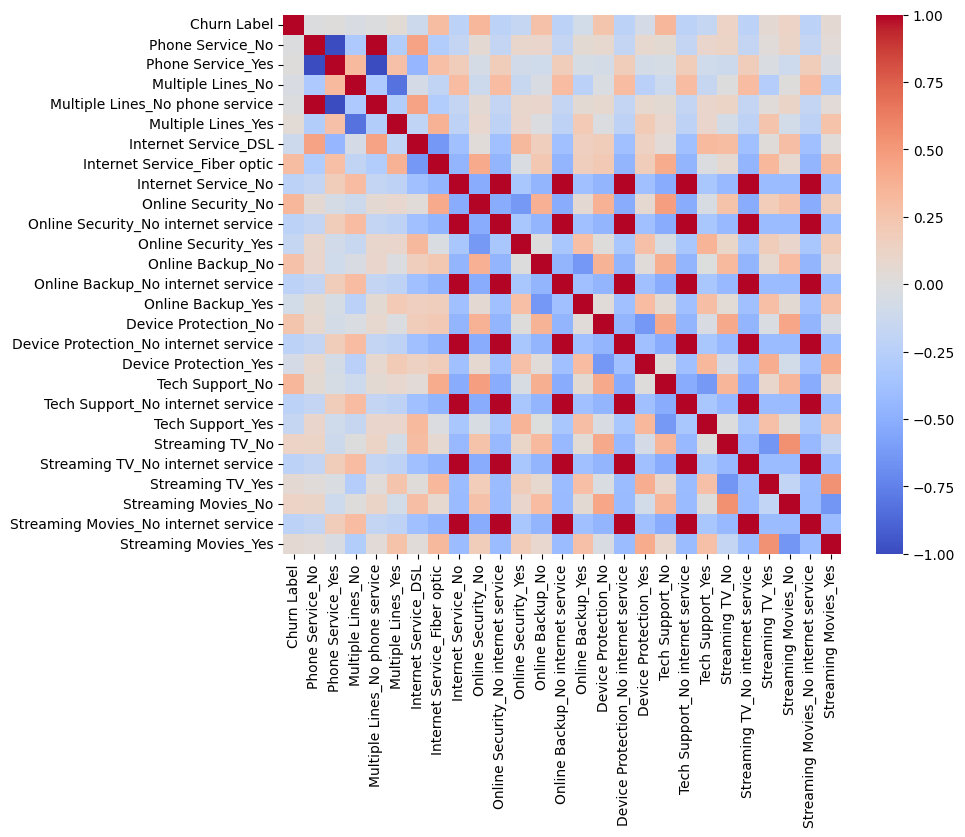

In [ ]:
pl.figure(figsize=(9, 7))
sns.heatmap(df_dummies.corr(), annot=False, cmap='coolwarm')

pl.show()

In [ ]:
fig = px.bar(df_dummies.corr()['Churn Label'].sort_values(ascending = False),
             color = 'value')
fig.show()



*   fiber optic has a correlation with churn value
*   Same as online security and online backup services




**Internet Services **

let's see what types of internet services customers have, and then let's see their impact on th churn rate

In [ ]:
fig = px.bar(data.groupby('Internet Service')['CustomerID'].count().reset_index(),
             x='Internet Service',
             y='CustomerID',
             color = 'Internet Service',
             text = 'CustomerID')
fig.show()

Most clients are connected to the fiber optic internet

Let's see ehat internet services where used by customers who left the service:

In [ ]:
fig = px.pie(data.groupby(['Internet Service', 'Churn Label'])['CustomerID'].count().reset_index(),
             values='CustomerID',
             facet_col = 'Churn Label',
             names='Internet Service',
             title = 'What type of internet was connected to the clients who left the service?')
fig.show()

69 percent of those who left the service were connected to the fibre optic internet

Tech support and online security


In [ ]:
# Tech support
fig = px.bar(data.groupby(['Internet Service',
                                                'Tech Support',
                                                'Churn Label'])['CustomerID'].count().reset_index(),
             x="Internet Service",
             y="CustomerID",
             color="Churn Label",
             text = 'CustomerID',
             barmode="group",
             facet_col="Tech Support"
            )
fig.show()

Among the clints with fiber optics internet, the percentage of churn is lower for clients with the connected tech support option

In [ ]:
fig = px.pie(data.groupby(['Tech Support','Churn Label'])['CustomerID'].count().reset_index(),
             values='CustomerID',
             facet_col = 'Churn Label',
             hole = .5,
             names='Tech Support',
            title = 'Tech support option and churn')
fig.show()

77.5% of the customers who left the service did not have the tech support option enabled

**Online Security**

In [ ]:
fig = px.bar(data.groupby(['Internet Service','Online Security',
                                                'Churn Label'])['CustomerID'].count().reset_index(),
             x="Internet Service",
             y="CustomerID",
             color="Churn Label",
             #barmode="group",
             text = 'CustomerID',
             facet_col = 'Online Security'
            )
fig.show()

Let's move on to payment methods and summarize what we have already learned


*   the lowest churn rate among customers without Internet services (but there are fewer such customers)
*   69.2% of the clients in the churn were connected to the fiber optic Internet


*   the absence of connected technical support and online security options correlates with the churn variable

### Customer's payment method





In [ ]:
fig = px.bar(data.groupby(['Payment Method',
                                                'Churn Label'])['CustomerID'].count().reset_index(),
             x="CustomerID",
             y="Payment Method",
             color="Churn Label",
             text = 'CustomerID'
            )
fig.show()


Customers with an electornic check as a payment method have a churn rate of 50%

In [ ]:
fig = px.pie(data.groupby(['Payment Method','Churn Label'])['CustomerID'].count().reset_index(),
            values='CustomerID',
            names='Churn Label',
            facet_col = 'Payment Method',
            color = 'Churn Label',
            title = 'Churn rate by customer payment method')

fig.show()

Let's see if some specific Internet service was used by customers with an electronic check as a means of payment

In [ ]:
fig = px.bar(data.groupby(['Payment Method', 'Internet Service'])['CustomerID'].count().reset_index(),
             x='Payment Method',
             y='CustomerID',
             facet_col = 'Internet Service',
             color = 'CustomerID',
             text = 'CustomerID')
fig.show()

Most clients with optical fiber internet used electronic receipt as a means of payment
Lets see what the churn rate looks like for the internet service and payment method together

In [ ]:
churn_pm = data.assign(churn_clients = np.where(data['Churn Label']== 'Yes',data['CustomerID'],None))\
   .groupby(['Payment Method','Internet Service']).agg({'churn_clients':'count'}).reset_index()

In [ ]:
pm_clients = data.groupby(['Payment Method','Internet Service'])['CustomerID'].count().reset_index()

In [ ]:
pm_data = pm_clients.join(churn_pm.set_index(['Payment Method','Internet Service']), on=['Payment Method','Internet Service'])

In [ ]:
pm_data

,Payment Method,Internet Service,CustomerID,churn_clients
0,Bank transfer (automatic),DSL,564,51
1,Bank transfer (automatic),Fiber optic,639,180
2,Bank transfer (automatic),No,330,16
3,Credit card (automatic),DSL,593,71
4,Credit card (automatic),Fiber optic,594,148
5,Credit card (automatic),No,331,9
6,Electronic check,DSL,645,204
7,Electronic check,Fiber optic,1565,819
8,Electronic check,No,122,15
9,Mailed check,DSL,607,121


In [ ]:
pm_data['churn_rate,%'] = round(((pm_data['churn_clients']/pm_data['CustomerID']) * 100),2)

In [ ]:
fig = px.bar(pm_data.sort_values('churn_rate,%'),
             x='churn_rate,%',
             y='Payment Method',
             facet_col = 'Internet Service',
             color = 'churn_rate,%',
             text = 'churn_rate,%')
fig.show()

We see that for fiber optic internet, churn rates are higher for all payment methods, but the highest is for electronic and mailed checks.We also see that even for Internet DSL, the churn rate for these payment methods is increasing.

At this stage, we found out that the highest churn rate is observed among customers with an electronic check as a means of payment. This behavior is observed for all types of online services, but it is still stronger among customers with optical fiber Internet.

Let's look at other characteristics

### Gender and age of clients

**Customer's gender**


In [ ]:
fig = px.pie(data.groupby('Gender')['CustomerID'].count().reset_index(),
             values='CustomerID',
             names='Gender',
             color_discrete_sequence=px.colors.sequential.RdBu,
             title = 'Distribution of the clients by gender')
fig.show()

We almost have an equal number of mean and women in the dataset.
Let's see of there is a difference in the churn rate:


In [ ]:
fig = px.bar(data.groupby(['Gender',
                                                'Churn Label'])['CustomerID'].count().reset_index(),
             x="CustomerID",
             y="Gender",
             color="Churn Label",
             text = 'CustomerID'
            )
fig.show()

There's not great difference

Senior Citizen or not(Age)

In [ ]:
fig = px.pie(data.groupby(['Senior Citizen','Churn Label'])['CustomerID'].count().reset_index(),
            values='CustomerID',
            names='Churn Label',
            facet_col = 'Senior Citizen',
            color = 'Churn Label',
            title = 'Churn rate by customer age')

fig.show()

The churn rate among senior citizens is almost twice as high as among non-senior citizens. However, there are also much fewer such customers.

In [ ]:
data.groupby('Senior Citizen')['CustomerID'].count()

Senior Citizen
No     5852
Yes    1132
Name: CustomerID, dtype: int64

#### Impact of having a partner or dependants

In [ ]:
fig = px.bar(data.groupby(['Senior Citizen','Partner',
                                        'Dependents','Churn Label'])['CustomerID'].count().reset_index(),
             x="Senior Citizen",
             y="CustomerID",
             color="Churn Label",
             #barmode="group",
             facet_row="Partner",
             facet_col = 'Dependents'
            )
fig.show()

Let's see which services were used by senior citizens and move on to summarizing and building a model for churn prediction.

In [ ]:
fig = px.bar(data.groupby(['Senior Citizen','Internet Service','Churn Label'])['CustomerID'].count().reset_index(),
             x="Internet Service",
             y="CustomerID",
             color="Churn Label",
             barmode="group",
             facet_col = 'Senior Citizen'
            )
fig.show()

Among senior citizens, a larger percentage was connected to the optical fiber Internet, and for these customers we see the highest churn rate.

Let's summarize everything we learned after analyzing the data:

* The lowest churn rate among customers without Internet services (but there are fewer such customers)
* 69.2% of the clients in the churn were connected to the fiber optic Internet
the absence of connected technical support and online security options correlates with the churn variable
* If we look at the context of customers' payment methods, the highest churn rate is for customers with an electronic check, regardless of the type of Internet services
* The  сhurn rate for senior citizens is almost twice as high as for non-senior citizens

## Preparing data for the model

1. **Deleting the columns that we won't use**



In [ ]:
data = data.drop(['Country','State','Count','Zip Code','Churn Reason','City','Churn Score','Churn Value','CLTV','CustomerID','Lat Long',
                  'Latitude','Longitude'], axis = 1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6984 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             6984 non-null   object 
 1   Senior Citizen     6984 non-null   object 
 2   Partner            6984 non-null   object 
 3   Dependents         6984 non-null   object 
 4   Tenure Months      6984 non-null   int64  
 5   Phone Service      6984 non-null   object 
 6   Multiple Lines     6984 non-null   object 
 7   Internet Service   6984 non-null   object 
 8   Online Security    6984 non-null   object 
 9   Online Backup      6984 non-null   object 
 10  Device Protection  6984 non-null   object 
 11  Tech Support       6984 non-null   object 
 12  Streaming TV       6984 non-null   object 
 13  Streaming Movies   6984 non-null   object 
 14  Contract           6984 non-null   object 
 15  Paperless Billing  6984 non-null   object 
 16  Payment Method     6984 

2. **Changing categorical variables to numeric**

In [ ]:
data['Churn Label'].replace(to_replace='Yes', value=1, inplace=True)
data['Churn Label'].replace(to_replace='No',  value=0, inplace=True)

In [ ]:
def encode_data(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [ ]:
data = data.apply(lambda x: encode_data(x))
data.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,hex_id
0,1,0,0,0,2,1,0,0,2,2,...,0,0,0,0,1,3,53.85,108.15,1,528
4,1,0,0,1,49,1,2,1,0,2,...,0,2,2,0,1,0,103.70,5036.30,1,477
5,0,0,1,0,10,1,0,0,0,0,...,2,0,0,0,0,1,55.20,528.35,1,477
6,1,1,0,0,1,0,1,0,0,0,...,0,0,2,0,1,2,39.65,39.65,1,476
7,1,0,0,0,1,1,0,2,1,1,...,1,1,1,0,0,3,20.15,20.15,1,466


In [ ]:
fig = px.bar(data.corr()['Churn Label'].sort_values(ascending = False),
             color = 'value')
fig.show()

**3. Balancing the data**

We see that our data is unbalanced and we have more data about customers who are not in churn.

In [ ]:
data.groupby('Churn Label')['Churn Label'].count()

Churn Label
0    5174
1    1810
Name: Churn Label, dtype: int64

Unbalanced data is not good for binary classification because it can lead to biased model performance and inaccurate predictions. If the data is unbalanced, a classifier that always predicts the majority class can achieve a high accuracy rate, but such a model may not be useful in practice. To address this issue, various techniques can be used to balance the data, such as undersampling the majority class or oversampling the minority class. These techniques can help to ensure that the classifier is trained on a more balanced set of data and is therefore better equipped to make accurate predictions on new, unseen data.

We will use the Synthetic Minority Oversampling technique in order to balance our classes

In [ ]:
over = SMOTE(sampling_strategy= 1)

x = data.drop("Churn Label", axis = 1).sort_values
y = data['Churn Label'].values

In [ ]:
x,y = over.fit_resample(x,y)

ValueError: ignored

In [ ]:
!git add

fatal: not a git repository (or any of the parent directories): .git


In [ ]:
!git commit -m